# Using DBSCAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data=pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(data.iloc[:,1:]))
x

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [16]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=.5,min_samples=3).fit(x)
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [17]:
data['clust']=pd.Series(dbscan.labels_)
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [18]:
data.iloc[:,1:].groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
-1,10.000000,263.000000,48.000000,44.500000,-1.0
0,7.742857,168.877551,65.897959,20.757143,0.0


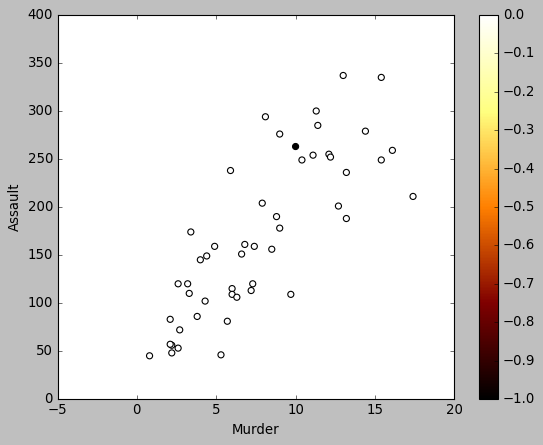

In [20]:
import seaborn as sns
plt.style.use('classic')
data.plot('Murder','Assault',s=30,kind='scatter',c=dbscan.labels_,cmap=plt.cm.afmhot)

# Using KMeans

In [21]:
from sklearn.cluster import KMeans

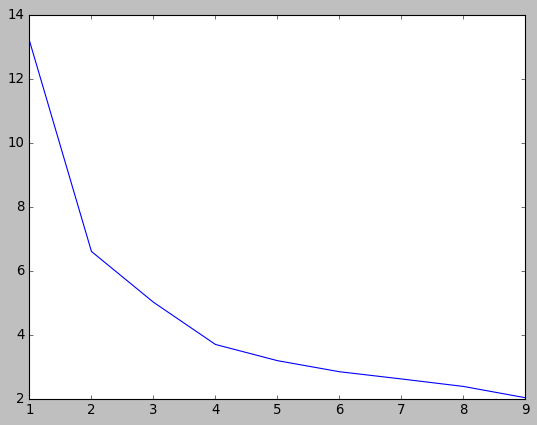

In [23]:
# WCSS
wcss=[]
for i in range (1,10):
    clf=KMeans(n_clusters=i).fit(x)
    wcss.append(clf.inertia_)
plt.plot(range(1,10),wcss)

In [24]:
# No. of Clusters = 4
clf=KMeans(n_clusters=4).fit(x)
clf.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [25]:
data_kmeans=data.copy()
data_kmeans

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [26]:
data_kmeans['clust']=clf.labels_
data_kmeans

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2


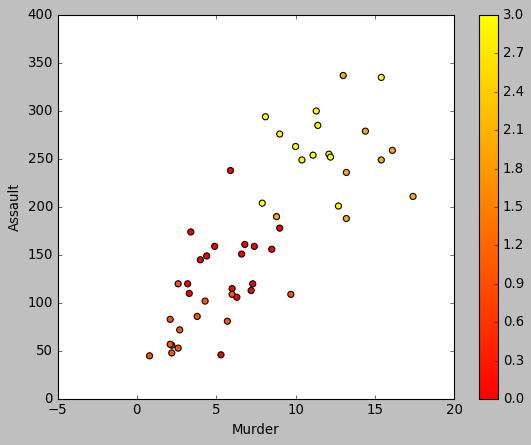

In [27]:
data_kmeans.plot("Murder","Assault",s=30,kind='scatter',c=clf.labels_,cmap=plt.cm.autumn)

# Using Hierarchical Clustering

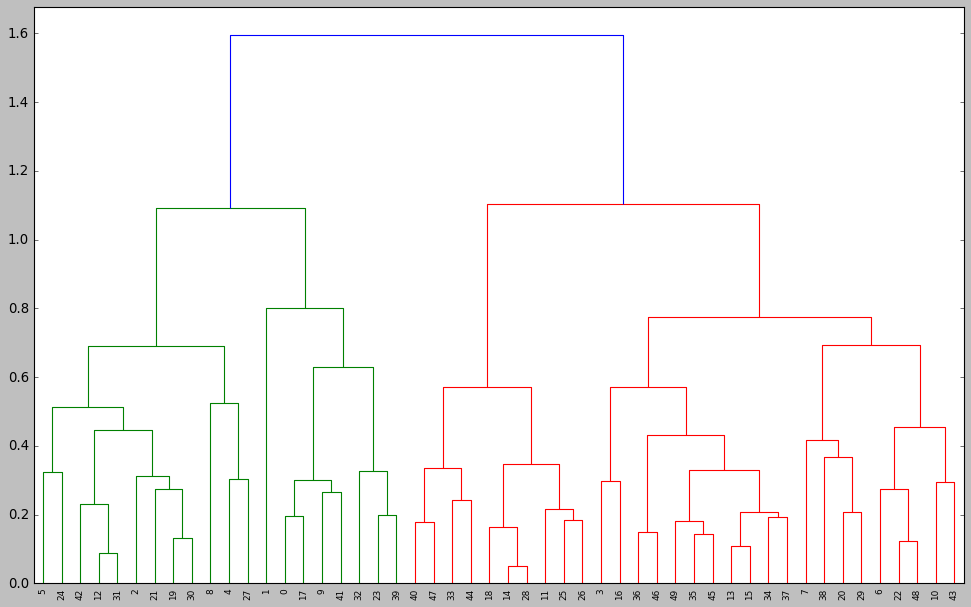

In [31]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
link=linkage(x,method='complete',metric='euclidean')
plt.figure(figsize=(15,9))
sch.dendrogram(link)
plt.show()

In [32]:
# From Dendrogram, No. of Clusters=8
hie=AgglomerativeClustering(n_clusters=8,affinity='euclidean',linkage='complete').fit(x)
hie.labels_

array([0, 4, 3, 5, 1, 3, 7, 6, 1, 0, 7, 2, 3, 5, 2, 5, 5, 0, 2, 3, 6, 3,
       7, 0, 3, 2, 2, 1, 2, 6, 3, 3, 0, 2, 5, 5, 5, 5, 6, 0, 2, 0, 3, 7,
       2, 5, 5, 2, 7, 5], dtype=int64)

In [34]:
data_hie=data.copy()
data_hie['clust']=hie.labels_
data_hie

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,7
7,Delaware,5.9,238,72,15.8,6
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0


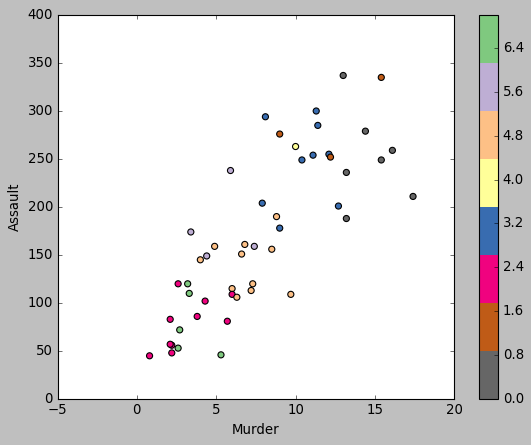

In [36]:
data_hie.plot('Murder','Assault',s=30,c=hie.labels_,kind='scatter',cmap=plt.cm.Accent_r)